In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


df = pd.read_csv('/content/drive/MyDrive/Final Project/DataSet/thinking.csv')


X = df[['F3', 'FC5', 'AF3', 'F7', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'F8', 'AF4', 'FC6', 'F4']]
y = df['Label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)




In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Confusion Matrix": conf_matrix.tolist()
}

with open('random_forest_metrics.txt', 'w') as f:
    f.write("Random Forest Model Metrics\n")
    f.write("===========================\n")
    for key, value in metrics.items():
        if key == "Confusion Matrix":
            f.write(f"{key}:\n")
            for row in value:
                f.write(f"{row}\n")
        else:
            f.write(f"{key}: {value}\n")

print("Metrics saved as 'random_forest_metrics.txt'")

joblib.dump(rf_model, 'random_forest_model.pkl')
print("Random Forest model saved as 'random_forest_model.pkl'")


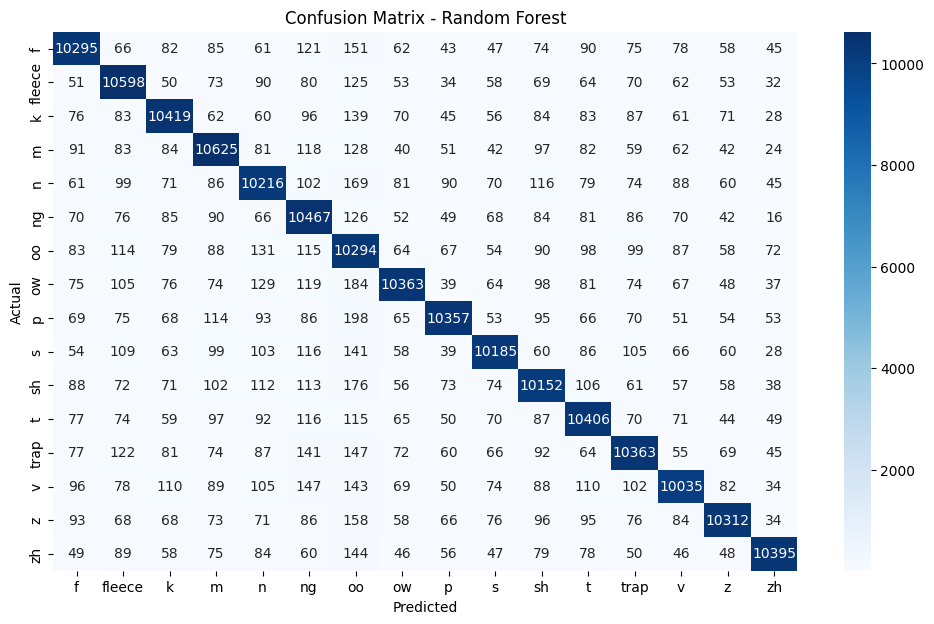

In [ ]:
# Confusion Matrix
plt.figure(figsize=(12, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

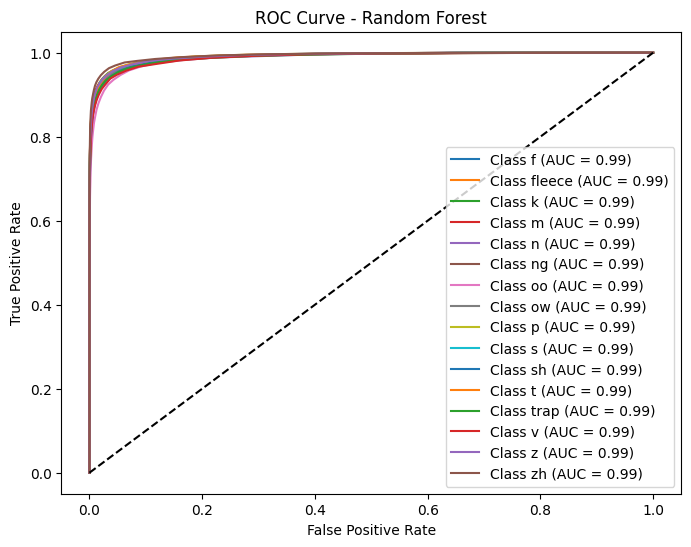

In [ ]:
#ROC Curve
plt.figure(figsize=(8, 6))
n_classes = len(label_encoder.classes_)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

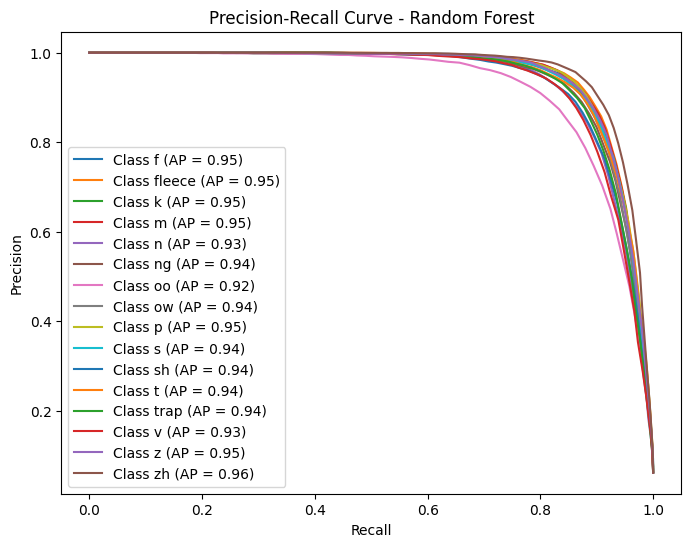

In [ ]:
#PR Curve
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), y_pred_proba[:, i])
    avg_precision = average_precision_score((y_test == i).astype(int), y_pred_proba[:, i])
    plt.plot(recall, precision, label=f"Class {label_encoder.classes_[i]} (AP = {avg_precision:.2f})")

plt.title("Precision-Recall Curve - Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.show()

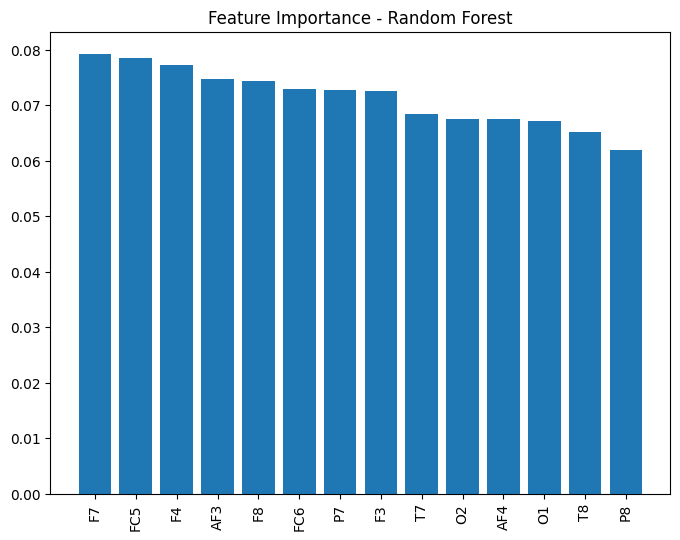

In [ ]:
# Feature Plot
plt.figure(figsize=(8, 6))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.title("Feature Importance - Random Forest")
plt.show()